In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_tariff = pd.read_csv((r"C:\Users\Admin\WORK\Time_series_analysis\src\data\Tariff_plans_change.csv"))
df_charges = pd.read_csv((r"C:\Users\Admin\WORK\Time_series_analysis\src\data\Charges.csv"))
df_suspended = pd.read_csv((r"C:\Users\Admin\WORK\Time_series_analysis\src\data\Suspended.csv"))

In [41]:
print(df_tariff.head())
print(df_charges.head())
print(df_suspended.head())


   SUBSCRIBER_ID  TARIFF_PLAN_ID          START_DTTM            END_DTTM
0              1               2 2013-11-22 21:10:08 2017-03-11 14:24:17
1              1               3 2017-03-11 14:24:18                 NaT
2              2               1 2016-02-05 16:36:34 2017-06-29 12:39:58
3              2               5 2017-06-29 12:39:59                 NaT
4              3               1 2015-05-06 19:17:46 2017-04-14 12:00:59
   SUBSCRIBER_ID  BILL_MONTH  CHARGES
0           4741  2017-03-01    4.572
1           1754  2017-05-01    4.894
2            381  2017-01-01    6.670
3           5832  2016-12-01    4.299
4           5277  2017-03-01    1.610
   SUBSCRIBER_ID    START_DT      END_DT     STATUS
0           5195  2017-12-27  2017-12-27  Suspended
1           5198  2017-04-18  2017-04-18  Suspended
2            381  2017-04-18  2017-04-20  Suspended
3           3500  2017-12-21      $null$  Suspended
4           3302  2016-08-23  2016-09-07  Suspended


In [ ]:
print(df_tariff.info())
print(df_charges.info())
print(df_suspended.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12344 entries, 0 to 12343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SUBSCRIBER_ID   12344 non-null  int64 
 1   TARIFF_PLAN_ID  12344 non-null  int64 
 2   START_DTTM      12344 non-null  object
 3   END_DTTM        12344 non-null  object
dtypes: int64(2), object(2)
memory usage: 385.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112595 entries, 0 to 112594
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SUBSCRIBER_ID  112595 non-null  int64  
 1   BILL_MONTH     112595 non-null  object 
 2   CHARGES        112595 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         

In [ ]:
print(df_tariff.head(10))
print(df_charges.head(10))


   SUBSCRIBER_ID  TARIFF_PLAN_ID          START_DTTM            END_DTTM
0              1               2 2013-11-22 21:10:08 2017-03-11 14:24:17
1              1               3 2017-03-11 14:24:18                 NaT
2              2               1 2016-02-05 16:36:34 2017-06-29 12:39:58
3              2               5 2017-06-29 12:39:59                 NaT
4              3               1 2015-05-06 19:17:46 2017-04-14 12:00:59
5              3               5 2017-04-14 12:01:00                 NaT
6              4               3 2016-01-27 23:03:51 2017-01-09 19:27:50
7              4               5 2017-01-09 19:27:51                 NaT
8              5               1 2016-02-06 08:07:15 2017-05-08 12:39:59
9              5               5 2017-05-08 12:40:00                 NaT
   SUBSCRIBER_ID  BILL_MONTH  CHARGES
0           4741  2017-03-01    4.572
1           1754  2017-05-01    4.894
2            381  2017-01-01    6.670
3           5832  2016-12-01    4.299
4      

In [5]:
# count tafiff
df_tariff['TARIFF_PLAN_ID'].unique()

array([2, 3, 1, 5, 4])

In [42]:
# Change type to datetime
df_tariff['START_DTTM'] = pd.to_datetime(df_tariff['START_DTTM'])
df_tariff['END_DTTM'] = pd.to_datetime(df_tariff['END_DTTM'], errors='coerce')  # '$null$'  to   NaT
df_charges['BILL_MONTH'] = pd.to_datetime(df_charges['BILL_MONTH'])
df_suspended['END_DT'] = pd.to_datetime(df_suspended['END_DT'], errors='coerce')  # '$null$'  to   NaT
df_suspended['START_DT'] = pd.to_datetime(df_suspended['START_DT'])

In [77]:


df = df_tariff.sort_values(['SUBSCRIBER_ID', 'START_DTTM'])                        # sort

df['PREV_TARIFF'] = df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)        #  make previous value tarif for everything SUBSCRIBE

transitions = df.dropna(subset=['PREV_TARIFF'])                                    # delete NAN in first row of "PREV_TARIFF" 
transition_counts = transitions.groupby(['PREV_TARIFF', 'TARIFF_PLAN_ID']).size().reset_index(name='COUNT')    # Count (From → To)

transition_counts.columns = ['FROM_TARIFF', 'TO_TARIFF', 'COUNT']
transition_counts['FROM_TARIFF'] = transition_counts['FROM_TARIFF'].astype(int)

print(transition_counts)


    FROM_TARIFF  TO_TARIFF  COUNT
0             1          1      9
1             1          2      5
2             1          3     55
3             1          4    378
4             1          5   1613
5             2          1     13
6             2          3     20
7             2          4    158
8             2          5    417
9             3          1     28
10            3          2     12
11            3          3     21
12            3          4    367
13            3          5   2372
14            4          1     37
15            4          2     20
16            4          3     56
17            4          4      8
18            4          5    528
19            5          1     81
20            5          2      4
21            5          3     75
22            5          4     49
23            5          5     29


In [35]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    node=dict(label=["Tariff 1", "Tariff 2", "Tariff 3", "Tariff 4", "Tariff 5"]),
    link=dict(
        source=transition_counts['FROM_TARIFF'] - 1,  # Индексы начинаются с 0
        target=transition_counts['TO_TARIFF'] - 1,
        value=transition_counts['COUNT']
    )
))
fig.show()



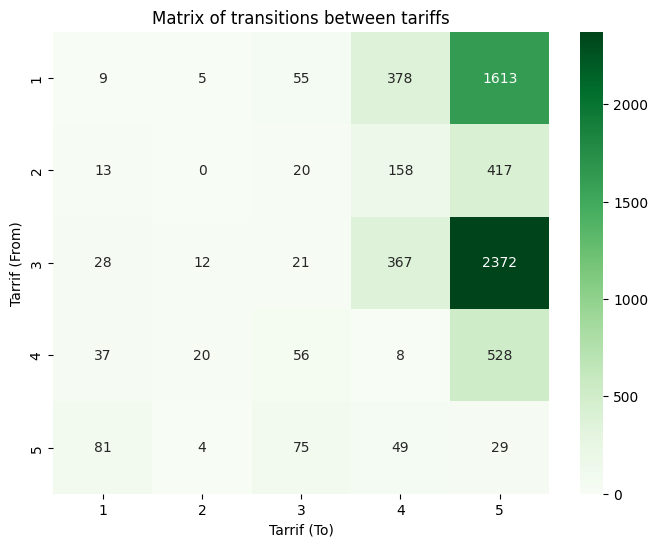

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем матрицу переходов
transition_matrix = pd.crosstab(
    index=transition_counts['FROM_TARIFF'], 
    columns=transition_counts['TO_TARIFF'],
    values=transition_counts['COUNT'], 
    aggfunc='sum'
).fillna(0)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, fmt='g', cmap='Greens')
plt.title('Matrix of transitions between tariffs')
plt.xlabel('Tarrif (To)')
plt.ylabel('Tarrif (From)')
plt.show()

In [ ]:
df['change_month'] = df['START_DTTM'].dt.to_period('M')     #changes format (yyyy-mm-dd) to (yyyy-mm)
transitions = df.dropna(subset=['PREV_TARIFF']).copy()      # delete Nan   
df


,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,PREV_TARIFF,change_month
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17,NaN,2013-11
1,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58,NaN,2016-02
3,2,5,2017-06-29 12:39:59,NaT,1.0,2017-06
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59,NaN,2015-05
...,...,...,...,...,...,...
12339,5987,3,2017-05-23 13:07:57,NaT,5.0,2017-05
12340,5988,1,2017-05-10 10:36:53,2017-05-22 16:36:55,NaN,2017-05
12341,5988,4,2017-05-22 16:36:56,NaT,1.0,2017-05
12342,5989,5,2017-05-24 14:46:11,2017-05-25 20:12:32,NaN,2017-05


In [74]:
transitions 

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,PREV_TARIFF,change_month
1,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03
3,2,5,2017-06-29 12:39:59,NaT,1.0,2017-06
5,3,5,2017-04-14 12:01:00,NaT,1.0,2017-04
7,4,5,2017-01-09 19:27:51,NaT,3.0,2017-01
9,5,5,2017-05-08 12:40:00,NaT,1.0,2017-05
...,...,...,...,...,...,...
12335,5985,5,2017-06-17 15:00:47,NaT,4.0,2017-06
12337,5986,1,2017-06-27 17:45:07,NaT,5.0,2017-06
12339,5987,3,2017-05-23 13:07:57,NaT,5.0,2017-05
12341,5988,4,2017-05-22 16:36:56,NaT,1.0,2017-05


In [69]:
test_df = df.head(100)  # или df.iloc[:100]


# # Создаем датафрейм с переходами между тарифами (исключая начальные записи без PREV_TARIFF)
transitions = df.dropna(subset=['PREV_TARIFF']).copy()
# transitions
transitions['transition'] = transitions['PREV_TARIFF'].astype(int).astype(str) + '→' + transitions['TARIFF_PLAN_ID'].astype(str)

transitions

# # Объединяем с данными о счетах (предполагаем, что billing содержит SUBSCRIBER_ID, MONTH и AMOUNT)
# # Анализ за 3 месяца до и после смены тарифа
# transitions['month_before'] = pd.to_datetime(transitions['change_month'] + '-01') - pd.DateOffset(months=3)
# transitions['month_after'] = pd.to_datetime(transitions['change_month'] + '-01') + pd.DateOffset(months=3)

# # Здесь должен быть код для расчета среднего счета до и после перехода
# # Для примера предположим, что мы создали колонки:
# # avg_before - средний счет за 3 месяца до перехода
# # avg_after - средний счет за 3 месяца после перехода
# # change - разница между avg_after и avg_before

# # Группируем по типам переходов и рассчитываем среднее изменение
# transition_stats = transitions.groupby('transition')['change'].agg(['mean', 'count']).reset_index()
# transition_stats = transition_stats[transition_stats['count'] > 10]  # Берем только значимые переходы

# # Разделяем на увеличение и уменьшение счета
# increase = transition_stats[transition_stats['mean'] > 0]
# decrease = transition_stats[transition_stats['mean'] < 0]

# # Визуализация
# plt.figure(figsize=(15, 6))

# plt.subplot(1, 2, 1)
# sns.barplot(data=increase, x='transition', y='mean', palette='Greens_d')
# plt.title('Переходы с ростом среднего счета')
# plt.xlabel('Переход между тарифами')
# plt.ylabel('Среднее увеличение счета')
# plt.xticks(rotation=45)

# plt.subplot(1, 2, 2)
# sns.barplot(data=decrease, x='transition', y='mean', palette='Reds_d')
# plt.title('Переходы со снижением среднего счета')
# plt.xlabel('Переход между тарифами')
# plt.ylabel('Среднее уменьшение счета')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,PREV_TARIFF,change_month,transition
1,1,3,2017-03-11 14:24:18,NaT,2.0,2017-03,2→3
3,2,5,2017-06-29 12:39:59,NaT,1.0,2017-06,1→5
5,3,5,2017-04-14 12:01:00,NaT,1.0,2017-04,1→5
7,4,5,2017-01-09 19:27:51,NaT,3.0,2017-01,3→5
9,5,5,2017-05-08 12:40:00,NaT,1.0,2017-05,1→5
...,...,...,...,...,...,...,...
12335,5985,5,2017-06-17 15:00:47,NaT,4.0,2017-06,4→5
12337,5986,1,2017-06-27 17:45:07,NaT,5.0,2017-06,5→1
12339,5987,3,2017-05-23 13:07:57,NaT,5.0,2017-05,5→3
12341,5988,4,2017-05-22 16:36:56,NaT,1.0,2017-05,1→4


In [60]:
results = []


test_df = df.head(100)  # или df.iloc[:100]
# for sub_id, group in test_df.groupby('SUBSCRIBER_ID'):
#     print(f"Абонент {sub_id} имеет {len(group)} записей")
#     # Дальнейшая обработка



for sub_id, group in test_df.groupby('SUBSCRIBER_ID'):                   #for work with onebody separately. group - Under dataframe (str with data of ID) 
    for i, row in group.iterrows():
        if pd.isna(row['change_month']):                             # Skip processing of lines where the tariff change date is not defined
            continue
            
        # Периоды до и после
        before_period = pd.period_range(end=row['change_month']-1, periods=3, freq='M')
        after_period = pd.period_range(start=row['change_month']+1, periods=3, freq='M')
        
        # Средний счет до
        before_avg = df_charges[(test_df['SUBSCRIBER_ID'] == sub_id) & 
            (df_charges['BILL_MONTH'].dt.to_period('M').isin(before_period))
        ]['CHARGES'].mean()
        
        # Средний счет после
        after_avg = df_charges[
            (test_df['SUBSCRIBER_ID'] == sub_id) & 
            (df_charges['BILL_MONTH'].dt.to_period('M').isin(after_period))
        ]['CHARGES'].mean()
        
        if not (pd.isna(before_avg)) and not (pd.isna(after_avg)):
            results.append({
                'subscriber_id': sub_id,
                'from_tariff': row['TARIFF_PLAN_ID'],
                'to_tariff': group.iloc[i+1]['TARIFF_PLAN_ID'] if i+1 < len(group) else None,
                'change_month': row['change_month'],
                'before_avg': before_avg,
                'after_avg': after_avg,
                'difference': after_avg - before_avg
            })

results_df = pd.DataFrame(results)

In [66]:
results_df

,subscriber_id,from_tariff,to_tariff,change_month,before_avg,after_avg,difference
0,7,5,None,2017-05,7.848,5.4280,-2.4200
1,10,5,None,2017-04,7.452,6.4420,-1.0100
2,14,5,None,2017-04,16.061,9.6890,-6.3720
3,23,5,None,2017-05,8.520,8.6285,0.1085
4,47,5,None,2017-06,6.753,4.9770,-1.7760
5,48,4,None,2017-04,13.220,49.2720,36.0520


In [62]:
# Группируем по направлениям (From → To)
transition_stats = results_df.groupby(['from_tariff', 'to_tariff']).agg({
    'difference': ['mean', 'count']
}).reset_index()

# Фильтруем значимые переходы (минимум 5 случаев)
significant_transitions = transition_stats[transition_stats[('difference', 'count')] >= 5]
significant_transitions.columns = ['from_tariff', 'to_tariff', 'mean_diff', 'count']

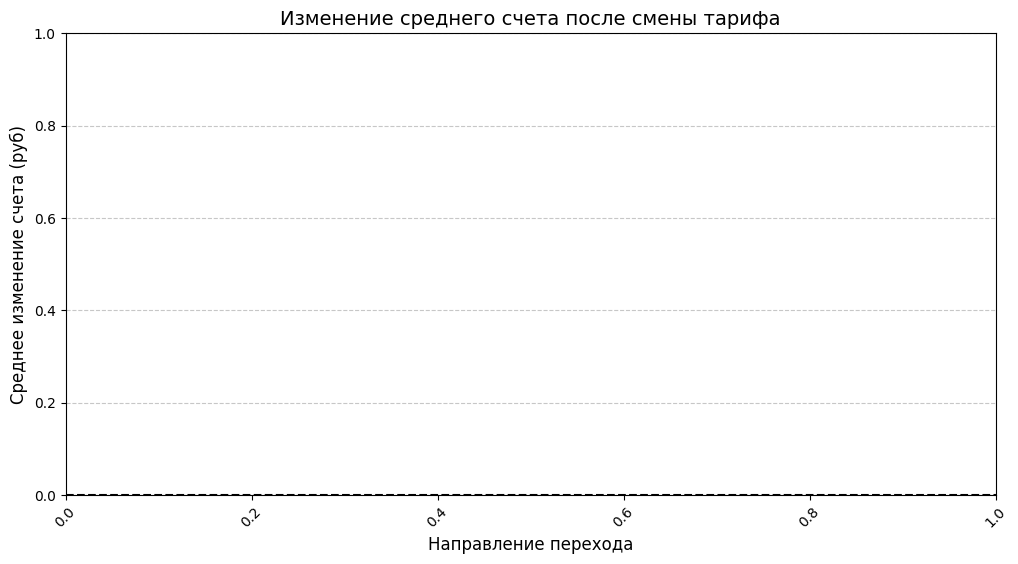

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=significant_transitions['from_tariff'].astype(str) + " → " + significant_transitions['to_tariff'].astype(str),
    y=significant_transitions['mean_diff'],
    palette=['red' if x < 0 else 'green' for x in significant_transitions['mean_diff']]
)
plt.axhline(0, color='black', linestyle='--')
plt.title('Изменение среднего счета после смены тарифа', fontsize=14)
plt.xlabel('Направление перехода', fontsize=12)
plt.ylabel('Среднее изменение счета (руб)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [64]:
pivot_table = significant_transitions.pivot(
    index='from_tariff',
    columns='to_tariff',
    values='mean_diff'
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap='RdYlGn',
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Изменение счета (руб)'}
)
plt.title('Тепловая карта изменений счета после смены тарифа', fontsize=14)
plt.xlabel('Новый тариф', fontsize=12)
plt.ylabel('Старый тариф', fontsize=12)
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x600 with 0 Axes>

In [49]:
transition_effects = results_df.groupby(['from_tariff', 'to_tariff']).agg({
    'before_avg': 'mean',
    'after_avg': 'mean',
    'difference': ['mean', 'count']
}).reset_index()

# Фильтруем значимые переходы (минимум 5 случаев)
significant_transitions = transition_effects[transition_effects[('difference', 'count')] >= 5]

Empty DataFrame
Columns: [(from_tariff, ), (to_tariff, ), (before_avg, mean), (after_avg, mean), (difference, mean), (difference, count)]
Index: []

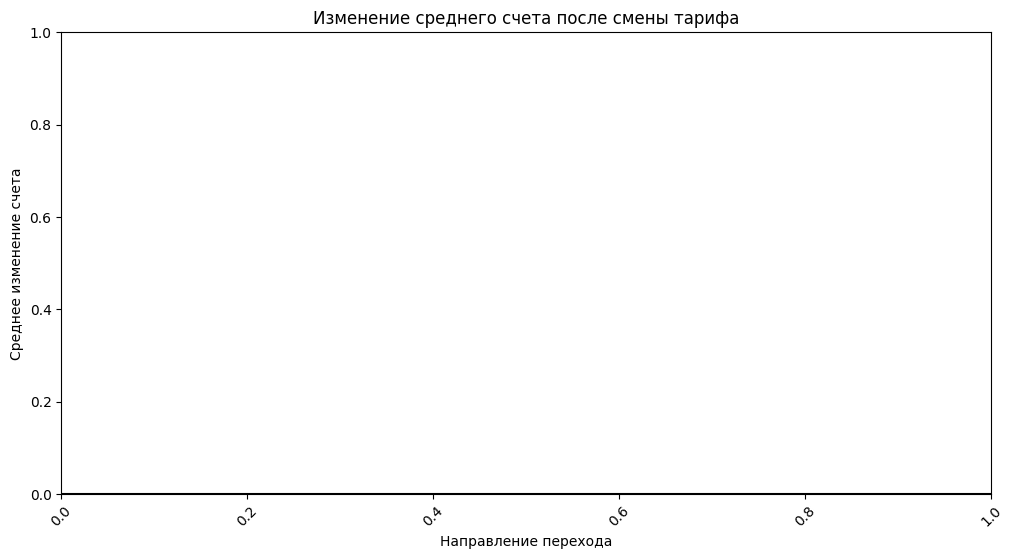

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=significant_transitions['from_tariff'].astype(str) + "→" + significant_transitions['to_tariff'].astype(str),
    y=significant_transitions[('difference', 'mean')],
    palette=['red' if x < 0 else 'green' for x in significant_transitions[('difference', 'mean')]]
)
plt.axhline(0, color='black')
plt.title('Изменение среднего счета после смены тарифа')
plt.ylabel('Среднее изменение счета')
plt.xlabel('Направление перехода')
plt.xticks(rotation=45)
plt.show()

In [52]:
pivot_table = significant_transitions.pivot(
    index='from_tariff',
    columns='to_tariff',
    values=('difference', 'mean')
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    center=0,
    linewidths=.5
)
plt.title('Тепловая карта изменений среднего счета')
plt.xlabel('Новый тариф')
plt.ylabel('Старый тариф')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x600 with 0 Axes>